#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [5]:
from collections import defaultdict
import csv
d=defaultdict(list)

In [6]:
filelist = ['turnstile_171223.txt', 'turnstile_171230.txt', 'turnstile_180106.txt']

In [7]:
for filename in filelist:
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
    #skip first line of headings
        next(reader)
    #dictionary keys will be tuples of the first 4 columns, and the values will be a list of lists
        for row in reader:
           d[tuple(row[:4])].append(row[4:])

### Challenge 2
Let's turn this into a time series.
For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [8]:
import dateutil.parser
d2=d.copy()


#loop through keys in copy, and modifies
for k in d2.keys():
    #loop through list of lists
    for v in d2[k]:
        #convert Date and Time to datetime object
        datetime =  dateutil.parser.parse(("%s %s") % (v[2], v[3]))
        #strip leading zeros
        entries = v[5].lstrip("0")
        #set first entry of list to datetime
        v[0] = datetime
        #set second entry of list to count of entries
        if entries != '':
            v[1] = int(entries)
        else:
            v[1] = 0
        #delete unnecessary elements in list
        del v[2:]
    

In [29]:
datetime_count_times = {turnstile: [[rows[i][0], # datetime first
                                      # delta on entries
                                     int(rows[i+1][1]) - int(rows[i][1])]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in d2.items()}

datetime_counts = {turnstile: [(time, count)
                               for (time, count) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

### Challenge 3
These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.



In [48]:
countsbyday = defaultdict(list)
for k,v in datetime_counts.items():
    by_day = defaultdict(int)
    for time, entries in v:
        day = time.date()
        if entries != '':
            by_day[day] += int(entries)
        else:
            by_day[day] += 0
    countsbyday[k] = sorted(by_day.items())

countsbyday.items()

#group by and sum entries

[(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
  [(datetime.date(2017, 12, 16), 863),
   (datetime.date(2017, 12, 17), 755),
   (datetime.date(2017, 12, 18), 1427),
   (datetime.date(2017, 12, 19), 1478),
   (datetime.date(2017, 12, 20), 1461),
   (datetime.date(2017, 12, 21), 1436),
   (datetime.date(2017, 12, 22), 1404),
   (datetime.date(2017, 12, 23), 716),
   (datetime.date(2017, 12, 24), 607),
   (datetime.date(2017, 12, 25), 368),
   (datetime.date(2017, 12, 26), 983),
   (datetime.date(2017, 12, 27), 1041),
   (datetime.date(2017, 12, 28), 1055),
   (datetime.date(2017, 12, 29), 1073),
   (datetime.date(2017, 12, 30), 598),
   (datetime.date(2017, 12, 31), 522),
   (datetime.date(2018, 1, 1), 380),
   (datetime.date(2018, 1, 2), 1148),
   (datetime.date(2018, 1, 3), 1290),
   (datetime.date(2018, 1, 4), 533),
   (datetime.date(2018, 1, 5), 937)]),
 (('R190', 'R038', '00-00-02', '215 ST'),
  [(datetime.date(2017, 12, 16), 813),
   (datetime.date(2017, 12, 17), 665),
   (dateti

### Challenge 4
We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

```%matplotlib inline```
This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with

```import matplotlib.pyplot as plt```

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:
```
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
```

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
dates = []
counts = []

for day in countsbyday.values():
    for date, entries in day:
        dates.append(date)
        counts.append(entries)


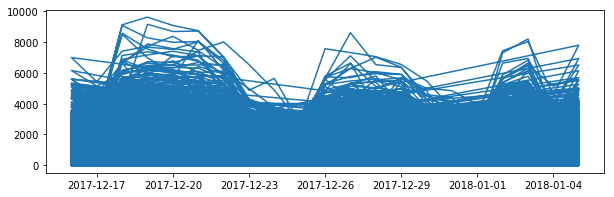

In [51]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts);

The above graph seemed quite crowded. This is one line per turnstile. Is this the desired output for Q4?

In the case that the desired output was aggregated entries by date, I have tried to implement that below:

In [52]:
datecounts = defaultdict(int)

for day in countsbyday.values():
    for date, entries in day:
        datecounts[date] += entries

x = sorted(datecounts.items())
dates2 = []
counts2 = []
for date in x:
    dates2.append(date[0])
    counts2.append(date[1])

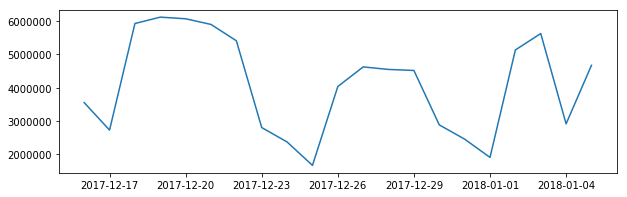

In [53]:
plt.figure(figsize=(10,3))
plt.plot(dates2, counts2);


Alternatively, was it supposed to just be for one turnstile? In which case, I have tried to implement that below:

In [54]:
dates3 = []
counts3 = []

for day in countsbyday.values()[0:1]:
    for date, entries in day:
        dates3.append(date)
        counts3.append(entries)


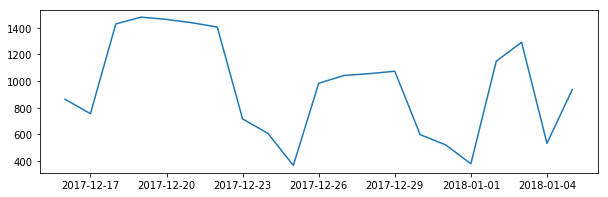

In [55]:
plt.figure(figsize=(10,3))
plt.plot(dates3, counts3);

### Challenge 5
So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.



In [56]:
entrylistbyday_CA = defaultdict(list)
for turnstile, entries in countsbyday.items():
    entrylistbyday_CA[turnstile[3] + " " + turnstile[1] + " " + turnstile[0]].append(entries)

In [57]:
countsbyday_CA = defaultdict(list)

for CA, entrieslist in entrylistbyday_CA.items():
    by_day = defaultdict(int)
    for datelist in entrieslist:
        for date, entries in datelist:
            by_day[date] += entries
    countsbyday_CA[CA] = sorted(by_day.items())


I understand this isn't the best way to do this at all, and I feel like I should be able to do a groupby without creating the interim "entrylistbydayCA" dictionary. Same as below.

### Challenge 6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.


In [58]:
entrylistbyday_Station = defaultdict(list)
for turnstile, entries in countsbyday.items():
    entrylistbyday_Station[turnstile[3]].append(entries)

In [59]:
countsbyday_Station = defaultdict(list)

for station, entrieslist in entrylistbyday_Station.items():
    by_day = defaultdict(int)
    for datelist in entrieslist:
        for date, entries in datelist:
            by_day[date] += entries
    countsbyday_Station[station] = sorted(by_day.items())


### Challenge 7
Plot the time series for a station.

In [60]:
station_dates = []
station_counts = []

for day in countsbyday_Station.values():
    for date, entries in day:
        station_dates.append(date)
        station_counts.append(entries)


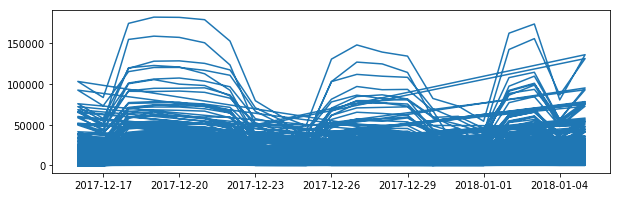

In [61]:
plt.figure(figsize=(10,3))
plt.plot(station_dates, station_counts);

Again, I have also done this for one station

In [62]:
station_dates2 = []
station_counts2 = []

for day in countsbyday_Station.values()[0:1]:
    for date, entries in day:
        station_dates2.append(date)
        station_counts2.append(entries)


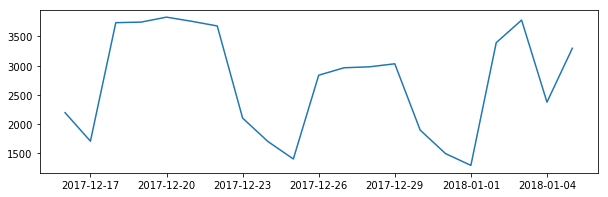

In [63]:
plt.figure(figsize=(10,3))
plt.plot(station_dates2, station_counts2);

### Challenge 8
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.


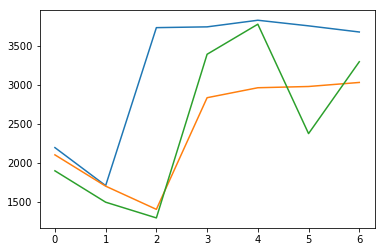

In [64]:
for entry in countsbyday_Station.values()[0:1]:
    allweeklycounts = []
    for date, entries in entry:
        allweeklycounts.append(entries)

weekcounts = [allweeklycounts[x:x+7] for x in xrange(0,len(allweeklycounts), 7)]

plt.plot(weekcounts[0]);
plt.plot(weekcounts[1]);
plt.plot(weekcounts[2]);

Again, I know this isn't the most elegant solution. I intend to look into how to make this more efficient. Also, wasn't entirely sure from the question whether we were meant to do this for all stations or not, but decided to keep it at 1 station for now. 

### Challenge 9
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate


In [65]:
total_ridership_by_station = defaultdict(int)

for station, entries in countsbyday_Station.items():
    for date, entry in entries:
        total_ridership_by_station[station] += entry

sorted(total_ridership_by_station.items(), key = lambda x: x[1], reverse = True)


[('34 ST-PENN STA', 2555845),
 ('GRD CNTRL-42 ST', 2112765),
 ('34 ST-HERALD SQ', 1882263),
 ('14 ST-UNION SQ', 1640428),
 ('TIMES SQ-42 ST', 1605643),
 ('23 ST', 1517925),
 ('42 ST-PORT AUTH', 1497873),
 ('FULTON ST', 1434021),
 ('86 ST', 1348691),
 ('47-50 STS ROCK', 1139209),
 ('125 ST', 1105528),
 ('59 ST COLUMBUS', 1081578),
 ('CANAL ST', 1078275),
 ('59 ST', 1049689),
 ('96 ST', 947418),
 ('FLUSHING-MAIN', 927763),
 ('JKSN HT-ROOSVLT', 812497),
 ('14 ST', 800321),
 ('50 ST', 799278),
 ('CHAMBERS ST', 755008),
 ('PATH NEW WTC', 734116),
 ('ATL AV-BARCLAY', 725357),
 ('28 ST', 709276),
 ('72 ST', 705064),
 ('42 ST-BRYANT PK', 664891),
 ('W 4 ST-WASH SQ', 611327),
 ('JAY ST-METROTEC', 580911),
 ('145 ST', 566024),
 ('8 AV', 555887),
 ('CHURCH AV', 550697),
 ('7 AV', 539690),
 ('WALL ST', 527736),
 ('116 ST', 525308),
 ('GRAND ST', 519988),
 ('JAMAICA CENTER', 517029),
 ('DEKALB AV', 505475),
 ('57 ST-7 AV', 501373),
 ('77 ST', 486022),
 ('49 ST', 480045),
 ('BOROUGH HALL', 469368),


### Challenge 10
Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

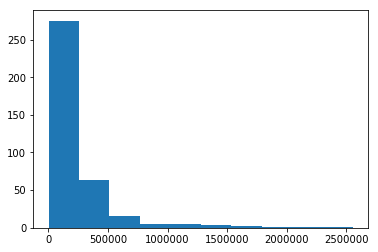

In [66]:
plt.hist(total_ridership_by_station.values());